In [6]:
# Imports
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.signal as signal
from matplotlib.ticker import FormatStrFormatter

from capture_utils import savefig_no_whitespace


In [7]:
# Parula colormap
from matplotlib.colors import LinearSegmentedColormap
from numpy import nan, inf

# Used to reconstruct the colormap in viscm
parameters = {'xp': [8.6840042204210732, -21.378780072752193, -13.715204596193757, -94.858944936224646, 53.679179741776352, -9.6],
              'yp': [-36.497267048261136, -44.616177228232843, 10.381246780010315, 84.763008758371967, 6.324059763008762, 41],
              'min_JK': 25.4069767442,
              'max_JK': 95}

cm_data = [[ 0.26710521,  0.03311059,  0.6188155 ],
       [ 0.26493929,  0.04780926,  0.62261795],
       [ 0.26260545,  0.06084214,  0.62619176],
       [ 0.26009691,  0.07264411,  0.62951561],
       [ 0.25740785,  0.08360391,  0.63256745],
       [ 0.25453369,  0.09395358,  0.63532497],
       [ 0.25147146,  0.10384228,  0.6377661 ],
       [ 0.24822014,  0.11337029,  0.6398697 ],
       [ 0.24478105,  0.12260661,  0.64161629],
       [ 0.24115816,  0.131599  ,  0.6429888 ],
       [ 0.23735836,  0.14038009,  0.64397346],
       [ 0.23339166,  0.14897137,  0.64456048],
       [ 0.22927127,  0.15738602,  0.64474476],
       [ 0.22501278,  0.16563165,  0.64452595],
       [ 0.22063349,  0.17371215,  0.64390834],
       [ 0.21616055,  0.18162302,  0.64290515],
       [ 0.21161851,  0.18936156,  0.64153295],
       [ 0.20703353,  0.19692415,  0.63981287],
       [ 0.20243273,  0.20430706,  0.63776986],
       [ 0.19784363,  0.211507  ,  0.63543183],
       [ 0.19329361,  0.21852157,  0.63282872],
       [ 0.18880937,  0.2253495 ,  0.62999156],
       [ 0.18442119,  0.23198815,  0.62695569],
       [ 0.18014936,  0.23844124,  0.62374886],
       [ 0.17601569,  0.24471172,  0.62040016],
       [ 0.17204028,  0.25080356,  0.61693715],
       [ 0.16824123,  0.25672163,  0.6133854 ],
       [ 0.16463462,  0.26247158,  0.60976836],
       [ 0.16123449,  0.26805963,  0.60610723],
       [ 0.15805279,  0.27349243,  0.60242099],
       [ 0.15509948,  0.27877688,  0.59872645],
       [ 0.15238249,  0.28392004,  0.59503836],
       [ 0.14990781,  0.28892902,  0.59136956],
       [ 0.14767951,  0.29381086,  0.58773113],
       [ 0.14569979,  0.29857245,  0.58413255],
       [ 0.1439691 ,  0.30322055,  0.58058191],
       [ 0.14248613,  0.30776167,  0.57708599],
       [ 0.14124797,  0.31220208,  0.57365049],
       [ 0.14025018,  0.31654779,  0.57028011],
       [ 0.13948691,  0.32080454,  0.5669787 ],
       [ 0.13895174,  0.32497744,  0.56375063],
       [ 0.13863958,  0.32907012,  0.56060453],
       [ 0.138537  ,  0.3330895 ,  0.55753513],
       [ 0.13863384,  0.33704026,  0.55454374],
       [ 0.13891931,  0.34092684,  0.55163126],
       [ 0.13938212,  0.34475344,  0.54879827],
       [ 0.14001061,  0.34852402,  0.54604503],
       [ 0.14079292,  0.35224233,  0.54337156],
       [ 0.14172091,  0.35590982,  0.54078769],
       [ 0.14277848,  0.35953205,  0.53828312],
       [ 0.14395358,  0.36311234,  0.53585661],
       [ 0.1452346 ,  0.36665374,  0.5335074 ],
       [ 0.14661019,  0.3701591 ,  0.5312346 ],
       [ 0.14807104,  0.37363011,  0.52904278],
       [ 0.1496059 ,  0.3770697 ,  0.52692951],
       [ 0.15120289,  0.3804813 ,  0.52488853],
       [ 0.15285214,  0.38386729,  0.52291854],
       [ 0.15454421,  0.38722991,  0.52101815],
       [ 0.15627225,  0.39056998,  0.5191937 ],
       [ 0.15802555,  0.39389087,  0.5174364 ],
       [ 0.15979549,  0.39719482,  0.51574311],
       [ 0.16157425,  0.40048375,  0.51411214],
       [ 0.16335571,  0.40375871,  0.51254622],
       [ 0.16513234,  0.40702178,  0.51104174],
       [ 0.1668964 ,  0.41027528,  0.50959299],
       [ 0.16864151,  0.41352084,  0.50819797],
       [ 0.17036277,  0.41675941,  0.50685814],
       [ 0.1720542 ,  0.41999269,  0.50557008],
       [ 0.17370932,  0.42322271,  0.50432818],
       [ 0.17532301,  0.42645082,  0.50313007],
       [ 0.17689176,  0.42967776,  0.50197686],
       [ 0.17841013,  0.43290523,  0.5008633 ],
       [ 0.17987314,  0.43613477,  0.49978492],
       [ 0.18127676,  0.43936752,  0.49873901],
       [ 0.18261885,  0.44260392,  0.49772638],
       [ 0.18389409,  0.44584578,  0.49673978],
       [ 0.18509911,  0.44909409,  0.49577605],
       [ 0.18623135,  0.4523496 ,  0.494833  ],
       [ 0.18728844,  0.45561305,  0.49390803],
       [ 0.18826671,  0.45888565,  0.49299567],
       [ 0.18916393,  0.46216809,  0.49209268],
       [ 0.18997879,  0.46546084,  0.49119678],
       [ 0.19070881,  0.46876472,  0.49030328],
       [ 0.19135221,  0.47208035,  0.48940827],
       [ 0.19190791,  0.47540815,  0.48850845],
       [ 0.19237491,  0.47874852,  0.4876002 ],
       [ 0.19275204,  0.48210192,  0.48667935],
       [ 0.19303899,  0.48546858,  0.48574251],
       [ 0.19323526,  0.48884877,  0.48478573],
       [ 0.19334062,  0.49224271,  0.48380506],
       [ 0.19335574,  0.49565037,  0.4827974 ],
       [ 0.19328143,  0.49907173,  0.48175948],
       [ 0.19311664,  0.50250719,  0.48068559],
       [ 0.192864  ,  0.50595628,  0.47957408],
       [ 0.19252521,  0.50941877,  0.47842186],
       [ 0.19210087,  0.51289469,  0.47722441],
       [ 0.19159194,  0.516384  ,  0.47597744],
       [ 0.19100267,  0.51988593,  0.47467988],
       [ 0.19033595,  0.52340005,  0.47332894],
       [ 0.18959113,  0.5269267 ,  0.47191795],
       [ 0.18877336,  0.530465  ,  0.47044603],
       [ 0.18788765,  0.53401416,  0.46891178],
       [ 0.18693822,  0.53757359,  0.46731272],
       [ 0.18592276,  0.54114404,  0.46563962],
       [ 0.18485204,  0.54472367,  0.46389595],
       [ 0.18373148,  0.5483118 ,  0.46207951],
       [ 0.18256585,  0.55190791,  0.4601871 ],
       [ 0.18135481,  0.55551253,  0.45821002],
       [ 0.18011172,  0.55912361,  0.45615277],
       [ 0.17884392,  0.56274038,  0.45401341],
       [ 0.17755858,  0.56636217,  0.45178933],
       [ 0.17625543,  0.56998972,  0.44946971],
       [ 0.174952  ,  0.57362064,  0.44706119],
       [ 0.17365805,  0.57725408,  0.44456198],
       [ 0.17238403,  0.58088916,  0.4419703 ],
       [ 0.17113321,  0.58452637,  0.43927576],
       [ 0.1699221 ,  0.58816399,  0.43648119],
       [ 0.1687662 ,  0.5918006 ,  0.43358772],
       [ 0.16767908,  0.59543526,  0.43059358],
       [ 0.16667511,  0.59906699,  0.42749697],
       [ 0.16575939,  0.60269653,  0.42428344],
       [ 0.16495764,  0.6063212 ,  0.42096245],
       [ 0.16428695,  0.60993988,  0.41753246],
       [ 0.16376481,  0.61355147,  0.41399151],
       [ 0.16340924,  0.61715487,  0.41033757],
       [ 0.16323549,  0.62074951,  0.40656329],
       [ 0.16326148,  0.62433443,  0.40266378],
       [ 0.16351136,  0.62790748,  0.39864431],
       [ 0.16400433,  0.63146734,  0.39450263],
       [ 0.16475937,  0.63501264,  0.39023638],
       [ 0.16579502,  0.63854196,  0.38584309],
       [ 0.16712921,  0.64205381,  0.38132023],
       [ 0.168779  ,  0.64554661,  0.37666513],
       [ 0.17075915,  0.64901912,  0.37186962],
       [ 0.17308572,  0.65246934,  0.36693299],
       [ 0.1757732 ,  0.65589512,  0.36185643],
       [ 0.17883344,  0.65929449,  0.3566372 ],
       [ 0.18227669,  0.66266536,  0.35127251],
       [ 0.18611159,  0.66600553,  0.34575959],
       [ 0.19034516,  0.66931265,  0.34009571],
       [ 0.19498285,  0.67258423,  0.3342782 ],
       [ 0.20002863,  0.67581761,  0.32830456],
       [ 0.20548509,  0.67900997,  0.3221725 ],
       [ 0.21135348,  0.68215834,  0.31587999],
       [ 0.2176339 ,  0.68525954,  0.30942543],
       [ 0.22432532,  0.68831023,  0.30280771],
       [ 0.23142568,  0.69130688,  0.29602636],
       [ 0.23893914,  0.69424565,  0.28906643],
       [ 0.2468574 ,  0.69712255,  0.28194103],
       [ 0.25517514,  0.69993351,  0.27465372],
       [ 0.26388625,  0.70267437,  0.26720869],
       [ 0.27298333,  0.70534087,  0.25961196],
       [ 0.28246016,  0.70792854,  0.25186761],
       [ 0.29232159,  0.71043184,  0.2439642 ],
       [ 0.30253943,  0.71284765,  0.23594089],
       [ 0.31309875,  0.71517209,  0.22781515],
       [ 0.32399522,  0.71740028,  0.21959115],
       [ 0.33520729,  0.71952906,  0.21129816],
       [ 0.3467003 ,  0.72155723,  0.20298257],
       [ 0.35846225,  0.72348143,  0.19466318],
       [ 0.3704552 ,  0.72530195,  0.18639333],
       [ 0.38264126,  0.72702007,  0.17822762],
       [ 0.39499483,  0.72863609,  0.17020921],
       [ 0.40746591,  0.73015499,  0.1624122 ],
       [ 0.42001969,  0.73158058,  0.15489659],
       [ 0.43261504,  0.73291878,  0.14773267],
       [ 0.44521378,  0.73417623,  0.14099043],
       [ 0.45777768,  0.73536072,  0.13474173],
       [ 0.47028295,  0.73647823,  0.1290455 ],
       [ 0.48268544,  0.73753985,  0.12397794],
       [ 0.49497773,  0.73854983,  0.11957878],
       [ 0.5071369 ,  0.73951621,  0.11589589],
       [ 0.51913764,  0.74044827,  0.11296861],
       [ 0.53098624,  0.74134823,  0.11080237],
       [ 0.5426701 ,  0.74222288,  0.10940411],
       [ 0.55417235,  0.74308049,  0.10876749],
       [ 0.56550904,  0.74392086,  0.10885609],
       [ 0.57667994,  0.74474781,  0.10963233],
       [ 0.58767906,  0.74556676,  0.11105089],
       [ 0.59850723,  0.74638125,  0.1130567 ],
       [ 0.609179  ,  0.74719067,  0.11558918],
       [ 0.61969877,  0.74799703,  0.11859042],
       [ 0.63007148,  0.74880206,  0.12200388],
       [ 0.64030249,  0.74960714,  0.12577596],
       [ 0.65038997,  0.75041586,  0.12985641],
       [ 0.66034774,  0.75122659,  0.1342004 ],
       [ 0.67018264,  0.75203968,  0.13876817],
       [ 0.67990043,  0.75285567,  0.14352456],
       [ 0.68950682,  0.75367492,  0.14843886],
       [ 0.69900745,  0.75449768,  0.15348445],
       [ 0.70840781,  0.75532408,  0.15863839],
       [ 0.71771325,  0.75615416,  0.16388098],
       [ 0.72692898,  0.75698787,  0.1691954 ],
       [ 0.73606001,  0.75782508,  0.17456729],
       [ 0.74511119,  0.75866562,  0.17998443],
       [ 0.75408719,  0.75950924,  0.18543644],
       [ 0.76299247,  0.76035568,  0.19091446],
       [ 0.77183123,  0.76120466,  0.19641095],
       [ 0.78060815,  0.76205561,  0.20191973],
       [ 0.78932717,  0.76290815,  0.20743538],
       [ 0.79799213,  0.76376186,  0.21295324],
       [ 0.8066067 ,  0.76461631,  0.21846931],
       [ 0.81517444,  0.76547101,  0.22398014],
       [ 0.82369877,  0.76632547,  0.2294827 ],
       [ 0.832183  ,  0.7671792 ,  0.2349743 ],
       [ 0.8406303 ,  0.76803167,  0.24045248],
       [ 0.84904371,  0.76888236,  0.24591492],
       [ 0.85742615,  0.76973076,  0.25135935],
       [ 0.86578037,  0.77057636,  0.25678342],
       [ 0.87410891,  0.77141875,  0.2621846 ],
       [ 0.88241406,  0.77225757,  0.26755999],
       [ 0.89070781,  0.77308772,  0.27291122],
       [ 0.89898836,  0.77391069,  0.27823228],
       [ 0.90725475,  0.77472764,  0.28351668],
       [ 0.91550775,  0.77553893,  0.28875751],
       [ 0.92375722,  0.7763404 ,  0.29395046],
       [ 0.9320227 ,  0.77712286,  0.29909267],
       [ 0.94027715,  0.7779011 ,  0.30415428],
       [ 0.94856742,  0.77865213,  0.3091325 ],
       [ 0.95686038,  0.7793949 ,  0.31397459],
       [ 0.965222  ,  0.7800975 ,  0.31864342],
       [ 0.97365189,  0.78076521,  0.32301107],
       [ 0.98227405,  0.78134549,  0.32678728],
       [ 0.99136564,  0.78176999,  0.3281624 ],
       [ 0.99505988,  0.78542889,  0.32106514],
       [ 0.99594185,  0.79046888,  0.31648808],
       [ 0.99646635,  0.79566972,  0.31244662],
       [ 0.99681528,  0.80094905,  0.30858532],
       [ 0.9970578 ,  0.80627441,  0.30479247],
       [ 0.99724883,  0.81161757,  0.30105328],
       [ 0.99736711,  0.81699344,  0.29725528],
       [ 0.99742254,  0.82239736,  0.29337235],
       [ 0.99744736,  0.82781159,  0.28943391],
       [ 0.99744951,  0.83323244,  0.28543062],
       [ 0.9973953 ,  0.83867931,  0.2812767 ],
       [ 0.99727248,  0.84415897,  0.27692897],
       [ 0.99713953,  0.84963903,  0.27248698],
       [ 0.99698641,  0.85512544,  0.26791703],
       [ 0.99673736,  0.86065927,  0.26304767],
       [ 0.99652358,  0.86616957,  0.25813608],
       [ 0.99622774,  0.87171946,  0.25292044],
       [ 0.99590494,  0.87727931,  0.24750009],
       [ 0.99555225,  0.88285068,  0.2418514 ],
       [ 0.99513763,  0.8884501 ,  0.23588062],
       [ 0.99471252,  0.89405076,  0.2296837 ],
       [ 0.99421873,  0.89968246,  0.2230963 ],
       [ 0.99370185,  0.90532165,  0.21619768],
       [ 0.99313786,  0.91098038,  0.2088926 ],
       [ 0.99250707,  0.91666811,  0.20108214],
       [ 0.99187888,  0.92235023,  0.19290417],
       [ 0.99110991,  0.92809686,  0.18387963],
       [ 0.99042108,  0.93379995,  0.17458127],
       [ 0.98958484,  0.93956962,  0.16420166],
       [ 0.98873988,  0.94533859,  0.15303117],
       [ 0.98784836,  0.95112482,  0.14074826],
       [ 0.98680727,  0.95697596,  0.12661626]]
parula = LinearSegmentedColormap.from_list('parula', cm_data)

cm_data[0] = [ 0., 0., 0.]
parula_black = LinearSegmentedColormap.from_list('parula_black', cm_data)




In [8]:
# Helper Functions
def get_diff_maps_and_rmses(gt, preds, mask):
    """
    Compares gt map to all preds and outputs a diff map for each one,
    as well as a range of diffs for the colorbar (min is always 0)
    """
    diffs = []
    rmses = []
    for pred in preds:
        diffs.append(np.abs(gt - pred)*mask)
        rmses.append(np.sqrt(np.mean((gt - pred)**2*mask)))
    max_diff = max(np.max(diff) for diff in diffs)
    return diffs, rmses, max_diff

def format_rmses(rmses):
    out = " & ".join("RMSE = {:0.3f}".format(rmse) for rmse in rmses)
    return out 

def crop_and_scale_figure(img, crop, newmin, newmax):
    """
    Assumes img is in [0,1]
    """
    img = img * (newmax - newmin) + newmin
    return img[crop[0]:crop[1], crop[2]:crop[3], ...]

def save_normalized_imgs_and_colorbar(imgs, names, cmap, norm, scenedir, imgtype, cbar_label):
    for name, img in zip(names, imgs):
        plt.figure()
        plt.imshow(img, cmap=cmap, norm=norm)
        savefig_no_whitespace(os.path.join(scenedir, "{}_{}_fig.png".format(name, imgtype)))
    # Save colorbar
    cb_fig, cb_ax = plt.subplots(1, 1, figsize=(0.5, 5))
    cb = mpl.colorbar.ColorbarBase(cb_ax,
                                   cmap=cmap, norm=norm, orientation='vertical')
    cb.set_ticks([norm.vmin, norm.vmax])
    cb_ax.tick_params(axis='y', labelsize=36)
    cb_ax.set_yticklabels(["{:0.1f}".format(norm.vmin),
                           "{:0.1f}".format(norm.vmax)])
    cb_ax.set_ylabel(cbar_label, fontsize=36)
#     cb_ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0,
                        hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.savefig(os.path.join(scenedir, "{}_colorbar.pdf".format(imgtype)),
                bbox_inches='tight',
                pad_inches=0.1)

def add_colorbar(ax, cmap, norm, orientation="vertical"):
    if orientation == "vertical":
        cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.01,ax.get_position().height])
    elif orientation == "horizontal":
        cax = fig.add_axes([ax.get_position().x1,ax.get_position().y1+0.03, ax.get_position().width, 0.01])
    else:
        raise ValueError("Unrecognized orientation: {}".format(orientation))
    cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation=orientation)
    return cax, cb

def add_minimal_colorbar(ax, cmap, norm, cbar_label, fontsize=36, ticksize=36, orientation="vertical"):
    cax, cb = add_colorbar(ax, cmap, norm, orientation)
    cb.set_ticks([norm.vmin, norm.vmax])
    if orientation == "vertical":
        cax.tick_params(axis='y', labelsize=ticksize)
        cax.set_yticklabels(["{:0.1f}".format(norm.vmin),
                               "{:0.1f}".format(norm.vmax)])
        cax.set_ylabel(cbar_label, fontsize=fontsize)
        cax.yaxis.set_label_coords(2.5, 0.5)
    elif orientation == "horizontal":
        cax.tick_params(axis='x', labelsize=ticksize)
        cax.set_xticklabels(["{:0.1f}".format(norm.vmin),
                               "{:0.1f}".format(norm.vmax)])
        cax.set_xlabel(cbar_label, fontsize=fontsize)
        cax.xaxis.set_label_coords(0.5, -1.0)
    else:
        raise ValueError("Unrecognized orientation: {}".format(orientation))

    return cax, cb

def set_bordercolor(ax1, color):
    ax1.spines['bottom'].set_color(color)
    ax1.spines['top'].set_color(color)
    ax1.spines['left'].set_color(color)
    ax1.spines['right'].set_color(color)
    return ax1

def set_borderwidth(ax1, width):
    ax1.spines['bottom'].set_linewidth(width)
    ax1.spines['top'].set_linewidth(width)
    ax1.spines['left'].set_linewidth(width)
    ax1.spines['right'].set_linewidth(width)
    return ax1

In [9]:
# Load Teaser Data
# scene = "8_31_outdoor3"
# scene = "8_29_conference_room_scene"
scene = "8_30_small_lab_scene"
# scene = "8_30_conference_room2_scene"
model = "midas"
# square crop everything with side length s
s = 700
scenedir = os.path.join("figures", model, scene)

# Get the Ground truth sorted out
a = np.load(os.path.join(scenedir, "mins_and_maxes.npy"), allow_pickle=True).item()
gt_z_proj_crop = plt.imread(os.path.join(scenedir, "gt_z_proj_crop_filled.png"))
top = gt_z_proj_crop.shape[0]//2 - s//2
bot = gt_z_proj_crop.shape[0]//2 + s//2
left = gt_z_proj_crop.shape[1]//2 - s//2
right = gt_z_proj_crop.shape[1]//2 + s//2
figure_crop = (top, bot, left, right)
gt_z_proj_crop = crop_and_scale_figure(gt_z_proj_crop, figure_crop, a["gt_z_proj_crop"][0], a["gt_z_proj_crop"][1])

z_init = crop_and_scale_figure(plt.imread(os.path.join(scenedir, "z_init.png")), figure_crop, a["z_init"][0], a["z_init"][1])
z_pred = crop_and_scale_figure(plt.imread(os.path.join(scenedir, "z_pred.png")), figure_crop, a["z_pred"][0], a["z_pred"][1])

preds = [z_init, z_pred]
names = ["z_init", "z_pred"]
diffs, rmses, max_diff = get_diff_maps_and_rmses(gt_z_proj_crop, preds, mask)

# Compute histograms
figure_min_depth = 0.4
figure_max_depth = 9.

# z_init_hist, _ = np.histogram(z_init, bins=bin_edges)
# gt_hist, _ = np.histogram(gt_z_proj_crop, bins=bin_edges)
# init_hist, _= np.histogram(z_init, bins=bin_edges)
# pred_hist, _ = np.histogram(z_pred, bins=bin_edges)

# Load SPAD data
# spad_data = np.load(os.path.join(scenedir, "spad_processed.npy"), allow_pickle=True).item()
spad_relevant = spad_data["spad_relevant"]
spad_single_relevant = np.sum(spad_relevant, axis=(0, 1))
bin_edges = np.linspace(figure_min_depth, figure_max_depth, len(spad_single_relevant) + 1)
bin_values = (bin_edges[1:] + bin_edges[:-1])/2

# GT Depth hist
gt_depth_hist, _ = np.histogram(gt_z_proj_crop, bins=bin_edges)

# Also square crop the rgb image
rgb_crop = crop_and_scale_figure(plt.imread(os.path.join(scenedir, "rgb_cropped.png")), figure_crop, 0., 1.)

# Save depth images
if np.min(gt_z_proj_crop) > 0.:
    gt_depth_cmap = parula
else:
    gt_depth_cmap = parula_black
depth_cmap = parula
figure_min_depth = 0.4
vmin = np.min(gt_z_proj_crop[gt_z_proj_crop > figure_min_depth])
vmax = np.max(gt_z_proj_crop[gt_z_proj_crop > figure_min_depth])
gt_depth_norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
init_depth_norm = mpl.colors.Normalize(vmin=a["z_init"][0], vmax=a["z_init"][1])

# Save diff maps
diff_cmap = mpl.cm.Reds
diff_norm = mpl.colors.Normalize(vmin=0., vmax=max_diff)
z_init_diff, z_pred_diff = diffs

FileNotFoundError: [Errno 2] No such file or directory: 'figures/midas/8_30_small_lab_scene/mins_and_maxes.npy'

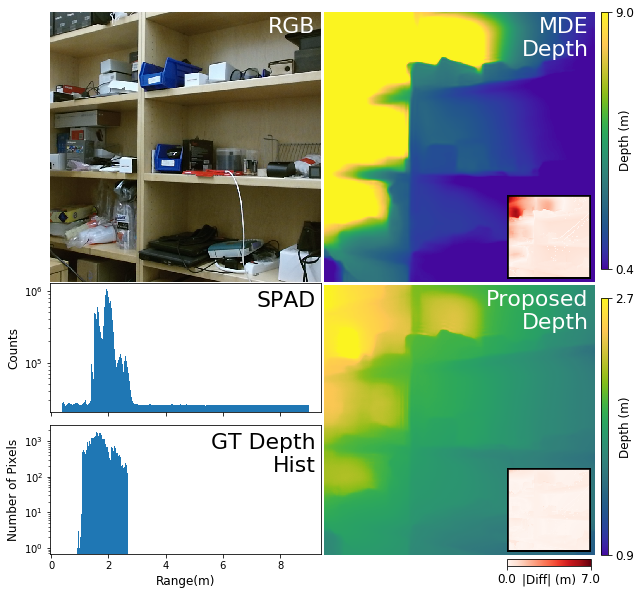

In [398]:
# Lay out Teaser
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patheffects as PathEffects
from matplotlib import gridspec

# fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig = plt.figure(figsize=(10, 10), constrained_layout=False)
gs_full = fig.add_gridspec(2, 2)
# gs_spad = gs_full[1, 0].subgridspec(2,1)
rgb_ax = fig.add_subplot(gs_full[0,0])
init_ax = fig.add_subplot(gs_full[0,1])
pred_ax = fig.add_subplot(gs_full[1,1])
# spad_ax = fig.add_subplot(gs_spad[0])

# rgb_ax = ax[0, 0]
# init_ax = ax[0, 1]
# pred_ax = ax[1, 1]
# spad_ax = ax[1, 0]

# RGB
rgb_ax.imshow(rgb_crop)
rgb_ax.axis('off')
rgb_pos = rgb_ax.get_position()

# Initial Depth
init_ax.imshow(z_init, cmap=depth_cmap, norm=depth_norm)
init_ax.axis('off')
# Initial Depth diff map
idax = inset_axes(init_ax, width="30%", height="30%", loc=4)
idax.imshow(z_init_diff, cmap=diff_cmap, norm=diff_norm)
idax.patch.set_edgecolor("black")
idax.patch.set_linewidth('3')
idax.get_xaxis().set_ticks([])
idax.get_yaxis().set_ticks([])

# idax.axis('off')
idax_pos = idax.get_position()

# GT Depth
gt_depth_norm = mpl.colors.Normalize(vmin=np.min(gt_z_proj_crop),
                                     vmax=np.max(gt_z_proj_crop))
# ax[1, 0].imshow(gt_z_proj_crop, cmap=depth_cmap, norm=gt_depth_norm)
# ax[1, 0].axis('off')

# SPAD
y_adjust = 0.007
spad_ax = fig.add_axes([rgb_pos.x0+0.005, rgb_pos.y0-0.206-y_adjust,
                        rgb_pos.width*1.098, rgb_pos.height/2+y_adjust])
# spad_ax.bar(range(10), range(10), log=True, width=0.01) # Placeholder
spad_ax.bar(bin_values, spad_single_relevant, log=True, width=0.01)
spad_ax.set_xticklabels([]) # Covered by GT Depth Hist tick labels
spad_ax.set_ylabel("Counts", fontsize=12)
spad_pos = spad_ax.get_position()
# print(spad_pos)
# spad_ax.set_position([rgb_pos.x0+0.3, spad_pos.y0, rgb_pos.width*0.5, rgb_pos.height/2])

# GT Depth Hist
gt_hist_ax = fig.add_axes([spad_pos.x0, spad_pos.y0-0.19-y_adjust, spad_pos.width, spad_pos.height])
# gt_hist_ax.bar(range(10), range(10), log=True, width=0.01) # Placeholder
gt_hist_ax.bar(bin_values, gt_depth_hist, log=True, width=0.01)
gt_hist_ax.set_xlabel("Range(m)", fontsize=12)
gt_hist_ax.set_ylabel("Number of Pixels", fontsize=12)

# Predicted Depth
pred_ax.imshow(z_pred, cmap=depth_cmap, norm=gt_depth_norm)
pred_ax.axis('off')
# Predicted depth diff map
pdax = inset_axes(pred_ax, width="30%", height="30%", loc=4)
pdax.imshow(z_pred_diff, cmap=diff_cmap, norm=diff_norm)
pdax.patch.set_edgecolor("black")
pdax.patch.set_linewidth('3')
pdax.get_xaxis().set_ticks([])
pdax.get_yaxis().set_ticks([])
# pdax.axis('off')

fig.subplots_adjust(wspace=-0.04, hspace=0.01)
# Depth_init colorbar (full scale)
cax_init, ccb_init = add_minimal_colorbar(init_ax, depth_cmap, init_depth_norm, "Depth (m)", fontsize=12, ticksize=12)
cax_init_pos = cax_init.get_position()
cax_init.set_position([cax_init_pos.x0, cax_init_pos.y0+0.018, cax_init_pos.width, cax_init_pos.height*0.95])

# Depth_pred and gt depth colorbar (reduced scale)
cax, ccb = add_minimal_colorbar(pred_ax, depth_cmap, gt_depth_norm, "Depth (m)", fontsize=12, ticksize=12)
cpos1 = cax.get_position()
cax.set_position([cpos1.x0, cpos1.y0, cpos1.width, cpos1.height*0.95])
dax, dcb = add_minimal_colorbar(idax, diff_cmap, diff_norm, "|Diff| (m)", fontsize=12, ticksize=12,
                                orientation="horizontal")
dpos1 = dax.get_position() # get the original position 
dpos2 = [idax_pos.x1-0.1261, idax_pos.y1-.77, dpos1.width*0.338, dpos1.height] 
dax.set_position(dpos2) # set a new position

# Text
imgfont = {
    "family": "sans-serif",
    "weight": "normal",
    "color": "white",
    "size": 22,
}
barfont = {
    "family": "sans-serif",
    "weight": "normal",
    "color": "black",
    "size": 22
}
txtpos = (0.98, 0.98)  # Specified as a fraction of the axis width
txt = rgb_ax.text(*txtpos, "RGB", fontdict=imgfont,
                  horizontalalignment='right',
                  verticalalignment='top',
                  transform=rgb_ax.transAxes)
# txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt = init_ax.text(*txtpos, "MDE\nDepth", fontdict=imgfont,
                   horizontalalignment='right',
                   verticalalignment='top',
                   transform=init_ax.transAxes)
# txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt = spad_ax.text(0.98, 0.94, "SPAD", fontdict=barfont,
                   horizontalalignment='right',
                   verticalalignment='top',
                   transform=spad_ax.transAxes)
txt = gt_hist_ax.text(0.98, 0.94, "GT Depth\nHist", fontdict=barfont,
                   horizontalalignment='right',
                   verticalalignment='top',
                   transform=gt_hist_ax.transAxes)
# txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt = pred_ax.text(*txtpos, "Proposed\nDepth", fontdict=imgfont,
                   horizontalalignment='right',
                   verticalalignment='top',
                   transform=pred_ax.transAxes)
# txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

plt.savefig(os.path.join("figures", model, scene, "teaser.pdf"), bbox_inches="tight")

In [ ]:
# Lay out Teaser using gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patheffects as PathEffects
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 16), constrained_layout=False)
gs = fig.add_gridspec(nrows=8, ncols=6)
# RGB
rgb_ax = fig.add_subplot(gs[:3, :3])
rgb_ax.imshow(rgb_crop)
rgb_ax.axis('off')

# GT
gt_ax = fig.add_subplot(gs[4:7, :3])
gt_ax.imshow(gt_z_proj_crop, cmap=depth_cmap, norm=gt_depth_norm)
gt_ax.axis('off')
gt_hist_ax = fig.add_subplot(gs[7, :2])
gt_hist_ax.bar(bin_values, gt_hist, log=True)

# Init
init_ax = fig.add_subplot(gs[:3, 3:])
init_ax.imshow(z_init, cmap=depth_cmap, norm=depth_norm)
init_ax.axis('off')

# Pred
pred_ax = fig.add_subplot(gs[4:7, 3:])
pred_ax.imshow(z_pred, cmap=depth_cmap, norm=gt_depth_norm)
pred_ax.axis('off')


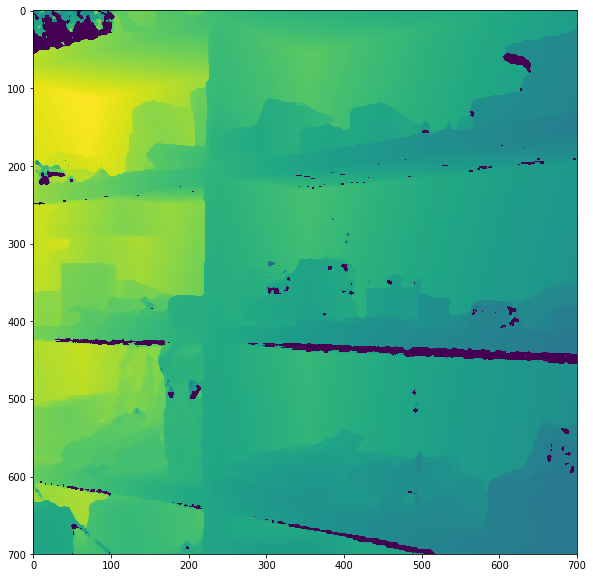

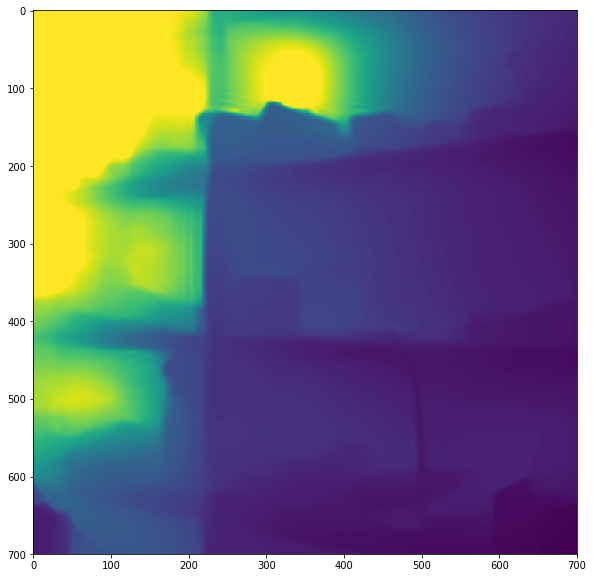

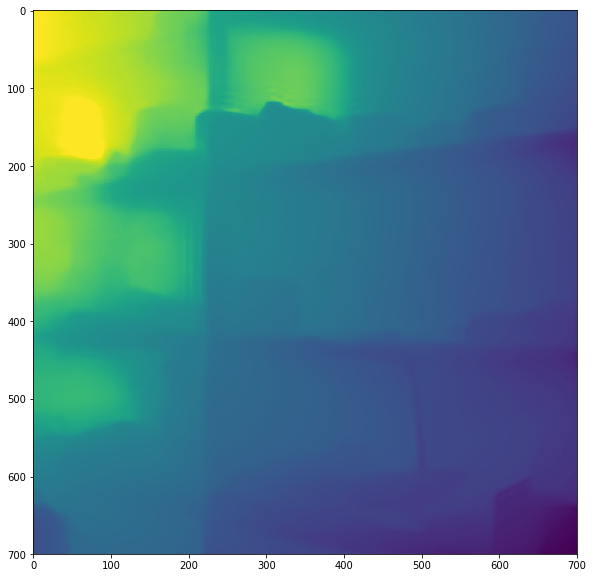

In [79]:
vmin = 1.0
vmax = np.max(gt_z_proj_crop)

plt.figure(figsize=(10, 10))
# plt.imshow(gt_z_proj_crop, vmin=vmin, vmax=vmax, cmap=cm.jet)
plt.imshow(gt_z_proj_crop)
plt.figure(figsize=(10, 10))
plt.imshow(z_init, vmax=vmax+1.)
plt.figure(figsize=(10, 10))
plt.imshow(z_pred, vmax=vmax)